## Importing Libraries

In [1]:
from bci_utils import *

<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


## Hyperparameters

In [2]:
# Set hyperparameters
CV_splits = 1
test_size = 0.2
random_state = 16
# num_layers = 2
# batch_size = 32
# n_epochs = 50
# Using same hyperparameters across models to compare performance

In [3]:
data_path = "../Data/BCICIV_2a_gdf/"

## Sample data

In [4]:
raw = mne.io.read_raw_gdf(data_path + "A01T.gdf")

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [5]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data
raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz
raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes
tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped


<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


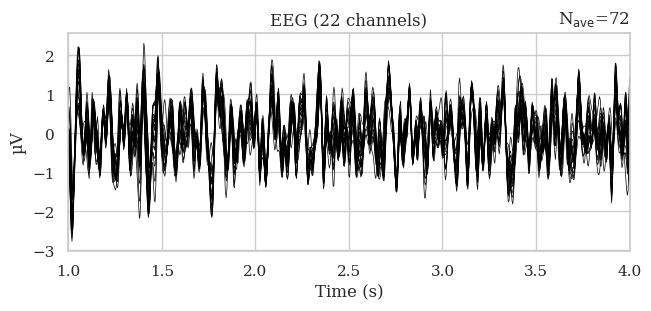

<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


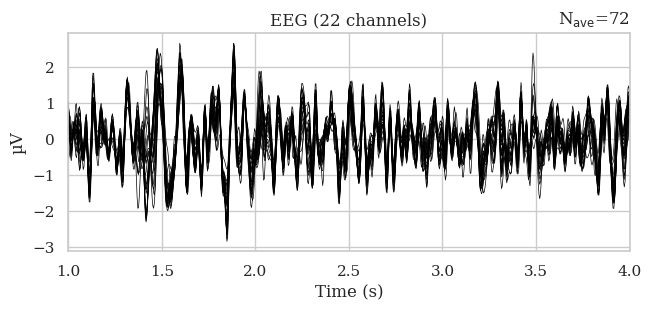

<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


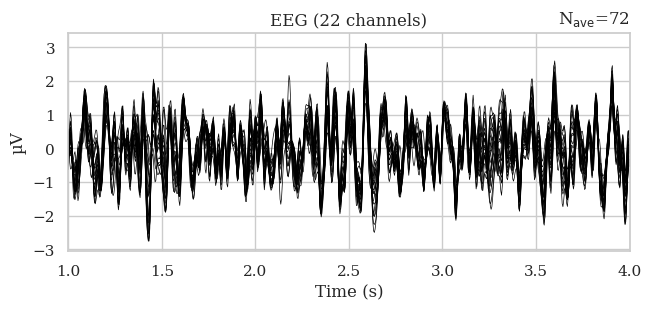

<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


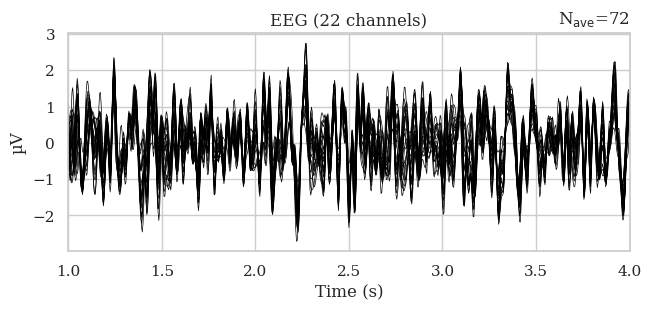

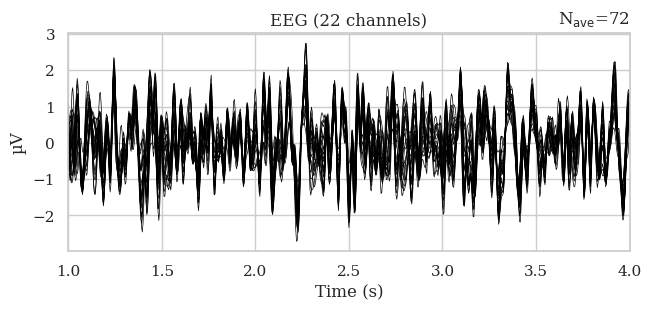

In [6]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot
evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot
evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot
evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot
evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [7]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 
data = epochs.get_data()

C:\Users\Sam\AppData\Local\Temp\ipykernel_27048\3131055463.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [8]:
reshaped_data = np.array(np.transpose(data, (0, 2, 1)))
reshaped_data = np.expand_dims(reshaped_data, axis=-1)

In [9]:
print(f"Data shape: {data.shape}, Reshaped Data shape: {reshaped_data.shape}, Labels shape: {labels.shape}")

Data shape: (288, 22, 751), Reshaped Data shape: (288, 751, 22, 1), Labels shape: (288,)


## Loading all Data

In [4]:
def load_file(filename):
    raw = mne.io.read_raw_gdf(data_path + filename)
    events, _ = mne.events_from_annotations(raw)
    raw.load_data()
    # raw.filter(7., 35., fir_design='firwin')
    raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
    picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                        exclude='bads')
    tmin, tmax = 1., 4.
    # left_hand = 769,right_hand = 770,foot = 771,tongue = 772
    event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True, on_missing='ignore')
    labels = epochs.events[:,-1] - 7 + 1 
    data = epochs.get_data()
    return data, labels

In [5]:
os.listdir(data_path)

['A01E.gdf',
 'A01T.gdf',
 'A02E.gdf',
 'A02T.gdf',
 'A03E.gdf',
 'A03T.gdf',
 'A04E.gdf',
 'A04T.gdf',
 'A05E.gdf',
 'A05T.gdf',
 'A06E.gdf',
 'A06T.gdf',
 'A07E.gdf',
 'A07T.gdf',
 'A08E.gdf',
 'A08T.gdf',
 'A09E.gdf',
 'A09T.gdf',
 'true_labels',
 'true_labels.zip']

In [ ]:
# train_list = []
# test_list = []
# for filename in os.listdir(data_path):
#     print(filename)
#     if filename.endswith("T.gdf"):
#         data, labels = load_file(filename)
#         # labels = scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel']
#         train_list.append((data, labels))
#     if filename.endswith("E.gdf"):
#         data, labels = load_file(filename)
#         labels = np.squeeze(scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel'])
#         test_list.append((data, labels))

In [ ]:
train_list = []
test_list = []
i=0
for filename in os.listdir(data_path):
    print(filename)
    i+=1
    if filename.endswith("T.gdf"):
        data, labels = load_file(filename)
        # labels = scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel']
        if i<=14:
            train_list.append((data, labels))
        else:
            test_list.append((data, labels))
    if filename.endswith("E.gdf"):
        data, labels = load_file(filename)
        labels = np.squeeze(scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel'])
        if i<=14:
            train_list.append((data, labels))
        else:
            test_list.append((data, labels))

In [8]:
# result = np.concatenate((all_data[0][0], all_data[1][0]), axis=0)
train_data = np.concatenate(([a[0] for a in train_list]), axis = 0)
train_label = np.concatenate(([a[1] for a in train_list]), axis = 0)
test_data = np.concatenate(([a[0] for a in test_list]), axis = 0)
test_label = np.concatenate(([a[1] for a in test_list]), axis = 0)

In [9]:
train_data.shape

(3888, 22, 751)

In [10]:
test_data.shape

(1152, 22, 751)

In [11]:
print("Train class split:")
unique_elements, counts = np.unique(train_label, return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")
print("Test class split:")
unique_elements, counts = np.unique(test_label, return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")

Train class split:
1: 1008
2: 1008
3: 936
4: 936
Test class split:
1: 288
2: 288
3: 288
4: 288


In [12]:
X = np.expand_dims(train_data,-1)
X_TEST = np.expand_dims(test_data,-1)

In [17]:
# reshaped_data = np.array(np.transpose(train_data, (0, 2, 1)))
# # reshaped_data = np.expand_dims(reshaped_data, axis=-1)
# reshaped_test_data = np.array(np.transpose(test_data, (0, 2, 1)))
# # reshaped_test_data = np.expand_dims(reshaped_test_data, axis=-1)
# X_RESHAPED = np.expand_dims(train_data,-1)
# X_TEST_RESHAPED = np.expand_dims(test_data,-1)

In [18]:
# X_RESHAPED.shape

In [13]:
# OneHotEncoding Labels
enc = OneHotEncoder()
y_out = enc.fit_transform(train_label.reshape(-1,1)).toarray()
y_out_test = enc.transform(test_label.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = CV_splits, test_size = test_size, random_state = random_state)

## Pre-processing - CSP

In [15]:
# Wavelet Packet Decomposition
# signal is decomposed to level 5 with 'db4' wavelet
wpd_data = feature_bands(train_data)
wpd_test_data = feature_bands(test_data)

In [16]:
Csp = [CSP(n_components=8, reg=None, log=True, norm_trace=False) for _ in range(8)]
ss = preprocessing.StandardScaler()

X_CSP = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,:,:,:], train_label) for x  in range(8)),axis=-1))

X_TEST_CSP = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_test_data[x,:,:,:]) for x  in range(8)),axis=-1))

Computing rank from data with rank=None
    Using tolerance 5.1e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.1e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.3e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    

In [23]:
X_CSP.shape

(2448, 64)

## Adding noise

In [ ]:
train_data_noise = create_noisy_dataset(train_data, snr = 10)
similarity = cosine_similarity(train_data, train_data_noise)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.8457417418441526


In [ ]:
test_data_noise = create_noisy_dataset(test_data, snr = 10)
similarity = cosine_similarity(test_data, test_data_noise)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.8458025622967928


In [ ]:
X_NOISE = np.expand_dims(train_data,-1)
X_TEST_NOISE = np.expand_dims(test_data,-1)

In [ ]:
wpd_data_noise = feature_bands(train_data_noise)
wpd_test_data_noise = feature_bands(test_data_noise)

In [77]:
Csp = [CSP(n_components=8, reg=None, log=True, norm_trace=False) for _ in range(8)]
ss = preprocessing.StandardScaler()

X_CSP_NOISE = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data_noise[x,:,:,:], train_label) for x  in range(8)),axis=-1))

X_TEST_CSP_NOISE = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_test_data_noise[x,:,:,:]) for x  in range(8)),axis=-1))

Computing rank from data with rank=None
    Using tolerance 4.6e-05 (2.2e-16 eps * 22 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6e-05 (2.2e-16 eps * 22 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6e-05 (2.2e-16 eps * 22 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    

## Graph Embedding

In [35]:
import numpy as np
import networkx as nx
from node2vec import Node2Vec

In [36]:
def generate_electrode_graph(num_electrodes):
    """
    Generate a fully connected graph representing electrode connections.
    
    Args:
    - num_electrodes (int): Number of electrodes.
    
    Returns:
    - graph (nx.Graph): Fully connected graph representing electrode connections.
    """
    # Create an empty graph
    graph = nx.complete_graph(num_electrodes)
    return graph
num_electrodes = 22
electrode_graph = generate_electrode_graph(num_electrodes)

def apply_node2vec(eeg_data, dimensions=64, walk_length=30, num_walks=200, workers=4):
    """
    Apply Node2Vec to learn embeddings for each electrode and aggregate them to represent each sample.
    
    Args:
    - eeg_data (np.ndarray): EEG data of shape (num_samples, num_electrodes, num_time_steps).
    - dimensions (int): Dimensionality of Node2Vec embeddings.
    - walk_length (int): Length of random walks in Node2Vec.
    - num_walks (int): Number of random walks per node in Node2Vec.
    - workers (int): Number of parallel processes for Node2Vec.
    
    Returns:
    - embeddings_per_sample (np.ndarray): Embeddings for each sample of shape (num_samples, dimensions).
    """
    num_samples, num_electrodes, _ = eeg_data.shape
    electrode_graph = generate_electrode_graph(num_electrodes)
    node2vec = Node2Vec(electrode_graph, dimensions=dimensions, walk_length=walk_length,
                        num_walks=num_walks, workers=workers)
    node2vec_model = node2vec.fit(window=10, min_count=1, batch_words=4)
    embeddings_per_sample = []
    for sample in eeg_data:
        sample_embeddings = []
        for electrode_data in sample:
            # Get the string representation of the electrode data
            electrode_key = ' '.join(map(str, electrode_data))
            # Check if the key exists in the vocabulary
            if electrode_key in node2vec_model.wv:
                # Get the embedding for the electrode
                electrode_embedding = node2vec_model.wv[electrode_key]
                sample_embeddings.append(electrode_embedding)
        if sample_embeddings:
            # Aggregate electrode embeddings for each sample
            sample_embedding = np.mean(sample_embeddings, axis=0)  # Mean aggregation
            embeddings_per_sample.append(sample_embedding)
        else:
            # If no embeddings were found for the sample, append zeros
            embeddings_per_sample.append(np.zeros(dimensions))
    
    # Convert embeddings_per_sample to numpy array
    embeddings_per_sample = np.array(embeddings_per_sample)
    
    return embeddings_per_sample

X_GRAPH = apply_node2vec(train_data)
X_TEST_GRAPH = apply_node2vec(test_data)

Computing transition probabilities:   0%|          | 0/22 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/22 [00:00<?, ?it/s]

## Triplet Loss

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define triplet loss function
def triplet_loss(margin):
    def loss(y_true, y_pred):
        anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        return tf.maximum(pos_dist - neg_dist + margin, 0)
    return loss

# Define model creation function
def create_model(input_shape, encoding_dim):
    base_input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(base_input)
    x = Dense(64, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='sigmoid')(x)

    base_model = Model(base_input, encoded)

    input_anchor = Input(shape=input_shape)
    input_positive = Input(shape=input_shape)
    input_negative = Input(shape=input_shape)

    encoded_anchor = base_model(input_anchor)
    encoded_positive = base_model(input_positive)
    encoded_negative = base_model(input_negative)

    merged_output = Lambda(lambda x: tf.stack([x[0], x[1], x[2]], axis=1))([encoded_anchor, encoded_positive, encoded_negative])

    model = Model(inputs=[input_anchor, input_positive, input_negative], outputs=merged_output)
    model.compile(loss=triplet_loss(margin=1.0), optimizer=Adam(0.0001))

    return model

# Define a function to generate triplets
def generate_triplets(eeg_data):
    triplets = []
    num_samples = eeg_data.shape[0]
    for i in range(num_samples):
        anchor = eeg_data[i]
        positive_idx = np.random.choice(num_samples)
        while positive_idx == i:
            positive_idx = np.random.choice(num_samples)
        positive = eeg_data[positive_idx]
        negative_idx = np.random.choice(num_samples)
        while negative_idx == i or negative_idx == positive_idx:
            negative_idx = np.random.choice(num_samples)
        negative = eeg_data[negative_idx]
        triplets.append((anchor, positive, negative))
    return np.array(triplets)

# Assuming EEG data has been preprocessed to have a uniform shape
input_shape = eeg_data_train.shape[1:]  # Shape excluding the number of samples
encoding_dim = 32  # Size of the embedding

# Generate triplets for training
triplets_train = generate_triplets(eeg_data_train)

# Extract anchor, positive, and negative data from triplets
anchor_data_train = triplets_train[:, 0]
positive_data_train = triplets_train[:, 1]
negative_data_train = triplets_train[:, 2]

# Dummy labels, not used in loss calculation
dummy_labels_train = np.empty((len(triplets_train), 3))

# Create the triplet loss model
model = create_model(input_shape, encoding_dim)

# Train the model
model.fit([anchor_data_train, positive_data_train, negative_data_train], dummy_labels_train, epochs=10, batch_size=32)

# Extract embeddings from the trained model
train_embeddings = model.predict(eeg_data_train)

## Avg Signals

In [17]:
avg_trials = []
avg_trials_test = []
for trial in train_data:
    avg_trial = np.mean(trial, axis=0)
    avg_trials.append(avg_trial)

X_AVG = np.array(avg_trials)
print("Train embeddings shape",X_AVG.shape)

for trial in test_data:
    avg_trial = np.mean(trial, axis=0)
    avg_trials_test.append(avg_trial)

X_TEST_AVG = np.array(avg_trials_test)
print("Test embeddings shape",X_TEST_AVG.shape)

Train embeddings shape (3888, 751)
Test embeddings shape (1152, 751)


# Direct comparision

## Training models

In [14]:
def CV_train(model, X, X_test, cnn = False, convlstm = False, batch_size = 32, n_epochs = 50):
    acc = []
    f1 = []
    prec = []
    recall = []
    results = {}
    best_model = model
    prev_metric = 0
    best_hist = []
    for train_idx, val_idx in cv.split(y_out):

        nn = [] 

        label_train, _ = y_out[train_idx], y_out[val_idx]
        y_train, y_val = y_out[train_idx], y_out[val_idx] 

        X_train = X[train_idx] 
        X_val = X[val_idx] 
        
        if cnn:
            X_train = np.expand_dims(X_train,-1)
        elif convlstm:
            X_train = np.expand_dims(np.expand_dims(X_train, -1),-1)

        nn = model

        history = nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = n_epochs)

        y_pred = nn.predict(X_val)
        pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

        acc_score = accuracy_score(y_val.argmax(axis=1), pred.argmax(axis=1))
        acc.append(acc_score)
        f1_val = (f1_score(y_val.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
        f1.append(f1_val)
        prec.append(precision_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        recall.append(recall_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        if f1_val > prev_metric: 
            prev_metric = f1_val
            best_model = model
            best_hist = history
    
    test_pred = best_model.predict(X_test)
    pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
    acc.append(accuracy_score(y_out_test.argmax(axis=1), pred.argmax(axis=1)))
    f1.append(f1_score(y_out_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    prec.append(precision_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    
    results['Accuracy'] = acc
    results['F1'] = f1
    results['Precision'] = prec
    results['Recall'] = recall

    plt.plot(best_hist.history['loss'], label='Training Loss')
    plt.plot(best_hist.history['val_loss'], label='Validation Loss', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    plt.plot(best_hist.history['accuracy'], label='Training Accuracy')
    plt.plot(best_hist.history['val_accuracy'], label='Validation Accuracy', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return best_model, results

## Models on Graph embedding

Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 1.4704 - accuracy: 0.2395
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.2579
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3855 - accuracy: 0.2584
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2533
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3851 - accuracy: 0.2549
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3850 - accuracy: 0.2615
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3849 - accuracy: 0.2630
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.2543
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2589
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2584
Epoch 11/50
62/62 [

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.2686
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 2ms/step - loss: 1.3858 - accuracy: 0.2543
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3856 - accuracy: 0.2436
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3855 - accuracy: 0.2584
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 2ms/step - loss: 1.3846 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3845 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3844 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 1.3842 - accuracy: 0.2676
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


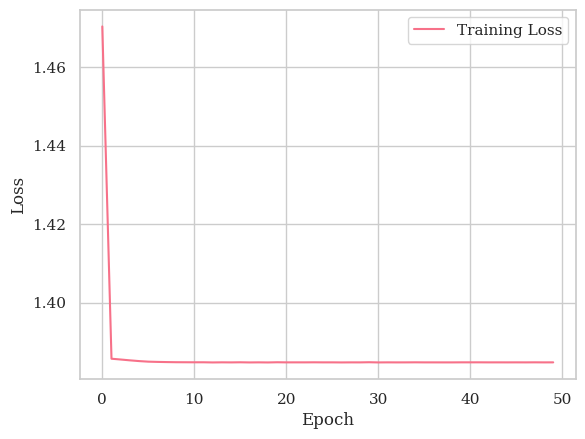

In [37]:
mlp_graph = build_mlp_classifier(num_layers)
mlp_graph, mlp_graph_results = CV_train(mlp_graph, X_GRAPH, X_TEST_GRAPH)

Epoch 1/50
62/62 [==============================] - 1s 7ms/step - loss: 2.0765 - accuracy: 0.2584
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 1.4201 - accuracy: 0.2646
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3854 - accuracy: 0.2651
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3852 - accuracy: 0.2569
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3851 - accuracy: 0.2559
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 1.3850 - accuracy: 0.2503
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3849 - accuracy: 0.2569
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2559
Epoch 9/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2646
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2646
Epoch 11/50
62/62 [

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 6ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 5ms/step - loss: 1.3858 - accuracy: 0.2543
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3856 - accuracy: 0.2436
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3855 - accuracy: 0.2620
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3855 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 6ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3854 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 5ms/step - loss: 1.3847 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3846 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3845 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3844 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3844 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3843 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: 1.3842 - accuracy: 0.2676
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


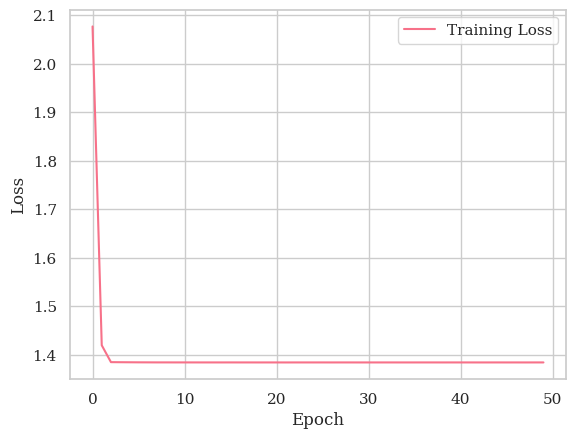

In [38]:
cnn_graph = build_cnn_classifier((64, 1), num_layers)
cnn_graph, cnn_graph_results = CV_train(cnn_graph, X_GRAPH, X_TEST_GRAPH, cnn = True)

## Models on Avg data

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 1.6963 - accuracy: 0.2554
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2584
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.2671
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2605
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.2620
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2630
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2620
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2584
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2472
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2589
Epoch 11/50
62/62 [

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2656
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2686
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2681
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2543
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 1.3860 - accuracy: 0.2549
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3860 - accuracy: 0.2549
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3859 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3859 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 1.3849 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3849 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3845 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3846 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.2630
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyError: 'val_loss'

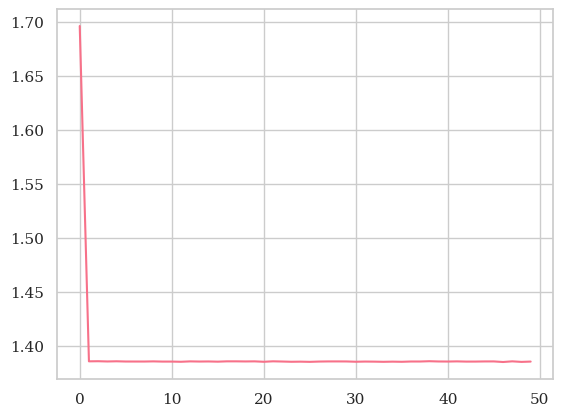

In [26]:
mlp_avg = build_mlp_classifier(num_layers)
mlp_avg, mlp_avg_results = CV_train(mlp_avg, X_AVG, X_TEST_AVG)

Epoch 1/50
62/62 [==============================] - 3s 32ms/step - loss: 1.6140 - accuracy: 0.2559
Epoch 2/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3869 - accuracy: 0.2528
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3865 - accuracy: 0.2661
Epoch 4/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3866 - accuracy: 0.2538
Epoch 5/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3868 - accuracy: 0.2671
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3872 - accuracy: 0.2538
Epoch 7/50
62/62 [==============================] - 2s 28ms/step - loss: 1.3866 - accuracy: 0.2656
Epoch 8/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3862 - accuracy: 0.2605
Epoch 9/50
62/62 [==============================] - 2s 29ms/step - loss: 1.3866 - accuracy: 0.2605
Epoch 10/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3861 - accuracy: 0.2549
Epoch 11/

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 30ms/step - loss: 1.3867 - accuracy: 0.2702
Epoch 2/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3870 - accuracy: 0.2681
Epoch 3/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3864 - accuracy: 0.2707
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 5/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2594
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3869 - accuracy: 0.2615
Epoch 7/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3863 - accuracy: 0.2753
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3869 - accuracy: 0.2666
Epoch 9/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 2s 29ms/step - loss: 1.3861 - accuracy: 0.2666
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 32ms/step - loss: 1.3875 - accuracy: 0.2462
Epoch 2/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3873 - accuracy: 0.2600
Epoch 3/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3873 - accuracy: 0.2600
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 32ms/step - loss: 1.3864 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3862 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3861 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2610
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81/81 [==============================] - 1s 9ms/step


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


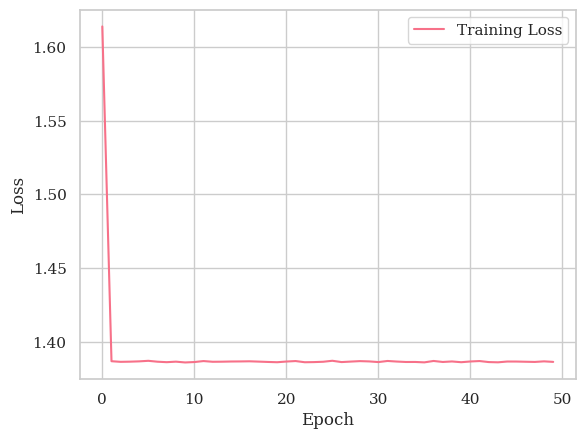

In [29]:
cnn_avg = build_cnn_classifier(input_shape = (751, 1), num_layers = num_layers)
cnn_avg, cnn_avg_results = CV_train(cnn_avg, X_AVG, X_TEST_AVG, cnn=True)

## Models on CSP data

In [29]:
## LR scheduler, early stopping?, model saving, take best val f1 score

Epoch 1/50


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


98/98 [==============================] - 1s 4ms/step - loss: 1.4365 - accuracy: 0.3707 - val_loss: 1.3020 - val_accuracy: 0.4203
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2602 - accuracy: 0.4669 - val_loss: 1.2612 - val_accuracy: 0.4987
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2047 - accuracy: 0.5225 - val_loss: 1.2263 - val_accuracy: 0.5334
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1816 - accuracy: 0.5434 - val_loss: 1.2086 - val_accuracy: 0.5167
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1562 - accuracy: 0.5621 - val_loss: 1.1973 - val_accuracy: 0.5334
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1390 - accuracy: 0.5669 - val_loss: 1.1661 - val_accuracy: 0.5681
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1111 - accuracy: 0.5785 - val_loss: 1.1552 - val_accuracy: 0.5643
Epoch 8/50
98/98 [=============

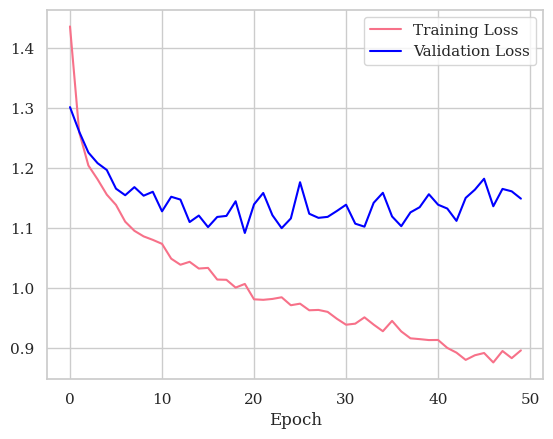

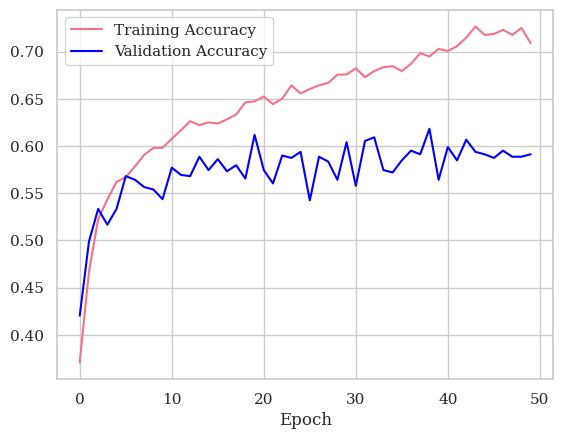

In [30]:
mlp_csp = build_mlp_classifier(lr = 0.001)
mlp_csp, mlp_csp_results = CV_train(mlp_csp, X_CSP, X_TEST_CSP, n_epochs = 50)

Epoch 1/75


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


98/98 [==============================] - 1s 6ms/step - loss: 2.1319 - accuracy: 0.3177 - val_loss: 1.6465 - val_accuracy: 0.3355
Epoch 2/75
98/98 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.3543 - val_loss: 1.3957 - val_accuracy: 0.3355
Epoch 3/75
98/98 [==============================] - 0s 4ms/step - loss: 1.3452 - accuracy: 0.3965 - val_loss: 1.2946 - val_accuracy: 0.3972
Epoch 4/75
98/98 [==============================] - 0s 4ms/step - loss: 1.2584 - accuracy: 0.4389 - val_loss: 1.2254 - val_accuracy: 0.4769
Epoch 5/75
98/98 [==============================] - 0s 4ms/step - loss: 1.2070 - accuracy: 0.4611 - val_loss: 1.1910 - val_accuracy: 0.5013
Epoch 6/75
98/98 [==============================] - 0s 4ms/step - loss: 1.1543 - accuracy: 0.5048 - val_loss: 1.1793 - val_accuracy: 0.4961
Epoch 7/75
98/98 [==============================] - 0s 4ms/step - loss: 1.1154 - accuracy: 0.5167 - val_loss: 1.1554 - val_accuracy: 0.5308
Epoch 8/75
98/98 [=============

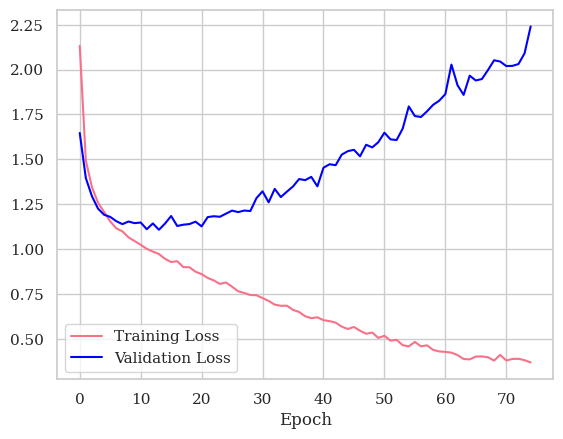

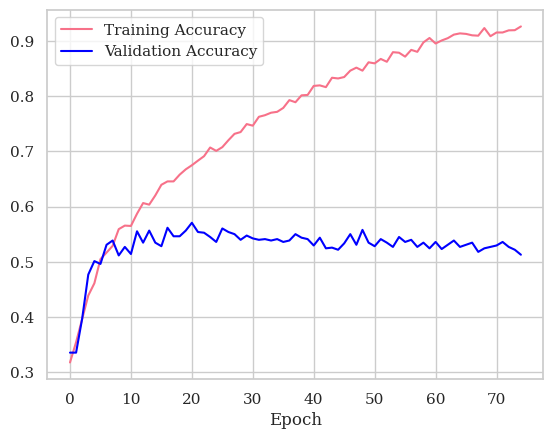

In [36]:
cnn_csp = build_cnn_classifier(input_shape = (64, 1), num_layers = 2, lr = 0.001)
cnn_csp, cnn_csp_results = CV_train(cnn_csp, X_CSP, X_TEST_CSP, cnn=True, n_epochs=75)

Epoch 1/50
62/62 [==============================] - 4s 13ms/step - loss: 1.7261 - accuracy: 0.3361
Epoch 2/50
62/62 [==============================] - 1s 13ms/step - loss: 1.3579 - accuracy: 0.4025
Epoch 3/50
62/62 [==============================] - 1s 15ms/step - loss: 1.3233 - accuracy: 0.4377
Epoch 4/50
62/62 [==============================] - 1s 14ms/step - loss: 1.3074 - accuracy: 0.4704
Epoch 5/50
62/62 [==============================] - 1s 13ms/step - loss: 1.2888 - accuracy: 0.4694
Epoch 6/50
62/62 [==============================] - 1s 14ms/step - loss: 1.2645 - accuracy: 0.4969
Epoch 7/50
62/62 [==============================] - 1s 13ms/step - loss: 1.2476 - accuracy: 0.5046
Epoch 8/50
62/62 [==============================] - 1s 13ms/step - loss: 1.2415 - accuracy: 0.5097
Epoch 9/50
62/62 [==============================] - 1s 14ms/step - loss: 1.2183 - accuracy: 0.5235
Epoch 10/50
62/62 [==============================] - 1s 15ms/step - loss: 1.2050 - accuracy: 0.5276
Epoch 11/

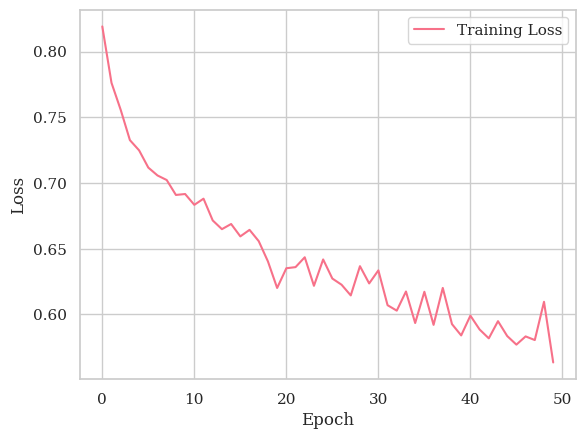

In [84]:
convlstm_csp = build_convlstm_classifier(input_shape = (64, 1, 1), num_layers = 1)
convlstm_csp, convlstm_csp_results = CV_train(convlstm_csp, X_CSP, X_TEST_CSP, convlstm = True)

In [ ]:
eegnet = build_eegnet_classifier(4, 64, 1)
eegnet, eegnet_results = CV_train(eegnet, X_CSP, X_TEST_CSP, cnn = True)

ValueError: Exception encountered when calling layer "average_pooling2d_2" (type AveragePooling2D).

Negative dimension size caused by subtracting 4 from 1 for '{{node average_pooling2d_2/AvgPool}} = AvgPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 1, 4, 1], padding="VALID", strides=[1, 1, 4, 1]](Placeholder)' with input shapes: [?,1,1,16].

Call arguments received by layer "average_pooling2d_2" (type AveragePooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 16), dtype=float32)

## Models on raw data

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
98/98 [==============================] - 3s 21ms/step - loss: 28.2853 - accuracy: 0.2601 - val_loss: 20.7114 - val_accuracy: 0.2442
Epoch 2/30
98/98 [==============================] - 2s 18ms/step - loss: 15.7329 - accuracy: 0.2630 - val_loss: 11.4874 - val_accuracy: 0.2442
Epoch 3/30
98/98 [==============================] - 2s 18ms/step - loss: 8.7451 - accuracy: 0.2592 - val_loss: 6.4341 - val_accuracy: 0.2442
Epoch 4/30
98/98 [==============================] - 2s 17ms/step - loss: 4.9824 - accuracy: 0.2630 - val_loss: 3.7789 - val_accuracy: 0.2442
Epoch 5/30
98/98 [==============================] - 2s 17ms/step - loss: 3.0487 - accuracy: 0.2630 - val_loss: 2.4552 - val_accuracy: 0.2442
Epoch 6/30
98/98 [==============================] - 2s 17ms/step - loss: 2.1089 - accuracy: 0.2630 - val_loss: 1.8340 - val_accuracy: 0.2442
Epoch 7/30
98/98 [==============================] - 2s 16ms/step - loss: 1.6801 - accuracy: 0.2630 - val_loss: 1.5613 - val_accuracy: 0.2442
Epoch 8/3

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 4ms/step


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


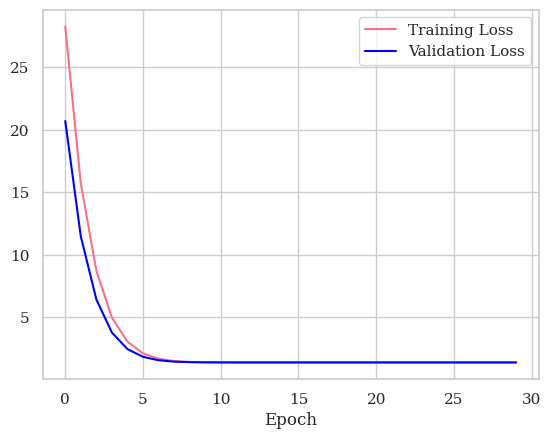

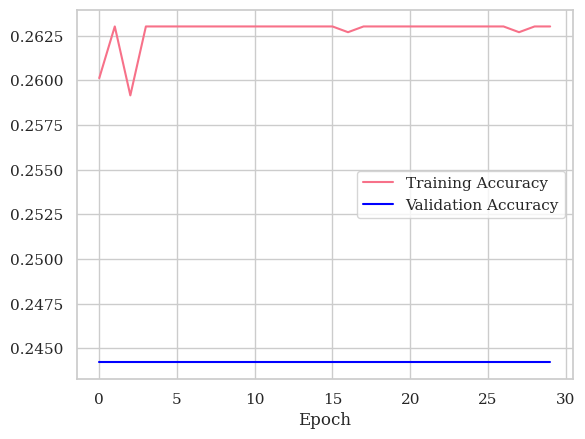

In [20]:
mlp = build_mlp_classifier(2, 0.0001)
mlp, mlp_results = CV_train(mlp, X, X_TEST, n_epochs=30)

In [21]:
mlp.predict(X_TEST)

36/36 [==============================] - 0s 4ms/step


array([[0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       ...,
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533]], dtype=float32)

In [54]:
cnn = build_cnn2d_classifier(input_shape = (22, 751, 1), num_layers = 0)
cnn, cnn_results = CV_train(cnn, X, X_TEST, n_epochs=20)

Epoch 1/50
62/62 [==============================] - 46s 725ms/step - loss: 1.5418 - accuracy: 0.2584
Epoch 2/50
62/62 [==============================] - 46s 733ms/step - loss: 1.4499 - accuracy: 0.2569
Epoch 3/50
62/62 [==============================] - 45s 721ms/step - loss: 1.4525 - accuracy: 0.2579
Epoch 4/50
62/62 [==============================] - 44s 705ms/step - loss: 1.4525 - accuracy: 0.2697
Epoch 5/50
62/62 [==============================] - 44s 705ms/step - loss: 1.4520 - accuracy: 0.2482
Epoch 6/50
50/62 [=======================>......] - ETA: 8s - loss: 1.4529 - accuracy: 0.2512

KeyboardInterrupt: 

In [29]:
# convlstm = build_convlstm_classifier(input_shape = (22, 751, 1), num_layers = 1)
# convlstm, convlstm_results = CV_train(convlstm, X, X_TEST, cnn = True)

In [44]:
def build_eegnet_classifier(lr = 0.01, nb_classes=4, Chans=22, Samples=751,
           dropoutRate=0.5, kernLength=64, F1=8,
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout', cpu=True):
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    if cpu:
        input_shape = (Samples, Chans, 1)
        conv_filters = (kernLength, 1)
        depth_filters = (1, Chans)
        pool_size = (6, 1)
        pool_size2 = (12, 1)
        separable_filters = (20, 1)
        axis = -1
    else:
        input_shape = (1, Chans, Samples)
        input_shape = (Chans, Samples, 1)
        conv_filters = (1, kernLength)
        depth_filters = (Chans, 1)
        pool_size = (1, 6)
        pool_size2 = (1, 12)
        separable_filters = (1, 20)
        axis = 1

    input1 = Input(shape=input_shape)
    block1 = Conv2D(F1, conv_filters, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D,
                             depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D(pool_size)(block1)
    block1 = dropoutType(dropoutRate)(block1)

    block2 = SeparableConv2D(F2, separable_filters,
                             use_bias=False, padding='same')(block1)
    block2 = BatchNormalization(axis=axis)(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D(pool_size2)(block2)
    block2 = dropoutType(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)

    dense = Dense(nb_classes, name='dense',
                  kernel_constraint=max_norm(norm_rate))(flatten)
    softmax = Activation('softmax', name='softmax')(dense)
    classifier = Model(inputs=input1, outputs=softmax)
    classifier.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [36]:
X_t = np.transpose(X, (0, 2, 1, 3))
X_TEST_t = np.transpose(X_TEST, (0, 2, 1, 3))

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
98/98 [==============================] - 14s 139ms/step - loss: 1.3713 - accuracy: 0.2942 - val_loss: 1.3877 - val_accuracy: 0.2442
Epoch 2/20
98/98 [==============================] - 13s 136ms/step - loss: 1.3147 - accuracy: 0.3614 - val_loss: 1.4233 - val_accuracy: 0.2571
Epoch 3/20
98/98 [==============================] - 14s 141ms/step - loss: 1.3100 - accuracy: 0.3572 - val_loss: 1.8062 - val_accuracy: 0.2545
Epoch 4/20
98/98 [==============================] - 13s 137ms/step - loss: 1.3003 - accuracy: 0.3666 - val_loss: 1.4465 - val_accuracy: 0.2442
Epoch 5/20
98/98 [==============================] - 13s 130ms/step - loss: 1.2893 - accuracy: 0.3672 - val_loss: 2.4061 - val_accuracy: 0.2442
Epoch 6/20
98/98 [==============================] - 13s 132ms/step - loss: 1.2787 - accuracy: 0.3920 - val_loss: 1.5868 - val_accuracy: 0.2468
Epoch 7/20
98/98 [==============================] - 13s 131ms/step - loss: 1.2727 - accuracy: 0.3871 - val_loss: 3.7219 - val_accuracy: 0.2571

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 2s 44ms/step


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


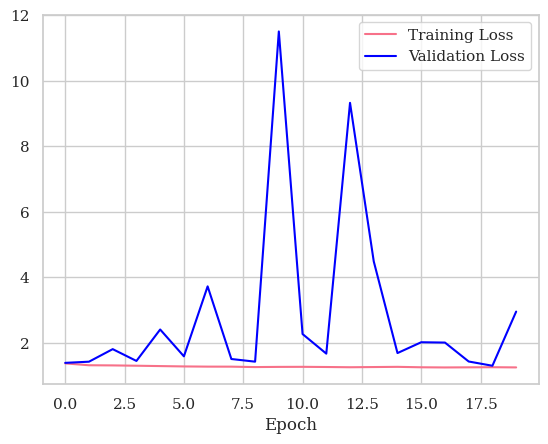

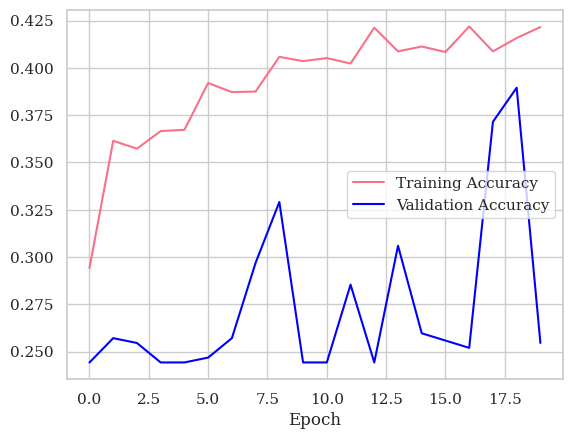

In [45]:
eegnet = build_eegnet_classifier()
eegnet, eegnet_results = CV_train(eegnet, X_t, X_TEST_t, n_epochs=20)

In [50]:

def build_shallow_conv_net(nb_classes=4, Chans=22, Samples=751, dropoutRate=0.5, cpu=True):
    if cpu:
        input_shape = (Samples, Chans, 1)
        conv_filters = (25, 1)
        conv_filters2 = (1, Chans)
        pool_size = (45, 1)
        strides = (15, 1)
        axis = -1
    else:
        input_shape = (1, Chans, Samples)
        conv_filters = (1, 20)
        conv_filters2 = (Chans, 1)
        pool_size = (1, 45)
        strides = (1, 15)
        axis = 1

    input_main = Input(input_shape)
    block1 = Conv2D(20, conv_filters,
                    input_shape=input_shape,
                    kernel_constraint=max_norm(2., axis=(0, 1, 2)))(input_main)
    block1 = Conv2D(20, conv_filters2, use_bias=False,
                    kernel_constraint=max_norm(2., axis=(0, 1, 2)))(block1)
    block1 = BatchNormalization(axis=axis, epsilon=1e-05, momentum=0.1)(block1)
    block1 = Activation(square)(block1)
    block1 = AveragePooling2D(pool_size=pool_size, strides=strides)(block1)
    block1 = Activation(log)(block1)
    block1 = Dropout(dropoutRate)(block1)
    flatten = Flatten()(block1)
    dense = Dense(nb_classes, kernel_constraint=max_norm(0.5))(flatten)
    softmax = Activation('softmax')(dense)

    return Model(inputs=input_main, outputs=softmax)


In [52]:
shallow_conv_net = build_shallow_conv_net()
shallow_conv_net.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
shallow_conv_net, Shallow_conv_net_results = CV_train(shallow_conv_net, X_t, X_TEST_t)

Epoch 1/50
98/98 [==============================] - 9s 87ms/step - loss: 5.0228 - accuracy: 0.2556 - val_loss: 1.6982 - val_accuracy: 0.2442
Epoch 2/50
98/98 [==============================] - 7s 71ms/step - loss: 3.2214 - accuracy: 0.2614 - val_loss: 1.6130 - val_accuracy: 0.2545
Epoch 3/50
98/98 [==============================] - 7s 69ms/step - loss: 2.5016 - accuracy: 0.2569 - val_loss: 1.5401 - val_accuracy: 0.2558
Epoch 4/50
98/98 [==============================] - 7s 67ms/step - loss: 2.1170 - accuracy: 0.2350 - val_loss: 1.6308 - val_accuracy: 0.2558
Epoch 5/50
98/98 [==============================] - 7s 67ms/step - loss: 2.1213 - accuracy: 0.2524 - val_loss: 2.0699 - val_accuracy: 0.2442
Epoch 6/50
98/98 [==============================] - 6s 65ms/step - loss: 1.9483 - accuracy: 0.2460 - val_loss: 1.9415 - val_accuracy: 0.2442
Epoch 7/50
98/98 [==============================] - 7s 68ms/step - loss: 1.7978 - accuracy: 0.2486 - val_loss: 1.7945 - val_accuracy: 0.2442
Epoch 8/50
98

KeyboardInterrupt: 

In [ ]:
deep_conv_net = build_deep_conv_net()
deep_conv_net.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
deep_conv_net, deep_conv_net_results = CV_train(deep_conv_net, X, X_TEST)

In [102]:
X.shape

(2448, 22, 751, 1)

In [105]:
X.transpose(0,2,1, 3).shape

(2448, 751, 22, 1)

In [ ]:
eegnet_fusion = build_eegnet_fusion()
# eegnet_fusion, eegnet_fusion_results = CV_train(eegnet_fusion, X.transpose(0,2,1, 3), X_TEST.transpose(0,2,1, 3))
eegnet_fusion, eegnet_fusion_results = CV_train(eegnet_fusion, X, X_TEST)

## Results

In [31]:
print_results(mlp_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.563265  0.561764   0.566665  0.563265
F2    0.567347  0.559894   0.582652  0.567347
F3    0.548980  0.549042   0.553798  0.548980
F4    0.573469  0.570538   0.574940  0.573469
Test  0.478781  0.479830   0.483203  0.478781
Avg   0.546368  0.544213   0.552252  0.546368
Best  0.573469  0.570538   0.574940  0.573469


In [32]:
print_results(cnn_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.524490  0.524033   0.524272  0.524490
F2    0.710204  0.708533   0.712515  0.710204
F3    0.789796  0.790282   0.791901  0.789796
F4    0.824490  0.823130   0.830997  0.824490
Test  0.399306  0.390788   0.406285  0.399306
Avg   0.649657  0.647353   0.653194  0.649657
Best  0.824490  0.823130   0.830997  0.824490


In [33]:
print_results(convlstm_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.571429  0.566577   0.589510  0.571429
F2    0.593878  0.589788   0.599532  0.593878
F3    0.638776  0.639659   0.642939  0.638776
F4    0.606122  0.606806   0.622782  0.606122
Test  0.482253  0.476469   0.513347  0.482253
Avg   0.578491  0.575860   0.593622  0.578491
Best  0.638776  0.639659   0.642939  0.638776


In [35]:
print_results(mlp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.267347  0.112794   0.071474  0.267347
F2    0.248980  0.099266   0.061991  0.248980
F3    0.248980  0.099266   0.061991  0.248980
F4    0.253061  0.102214   0.064040  0.253061
Test  0.250000  0.100000   0.062500  0.250000
Avg   0.253673  0.102708   0.064399  0.253673
Best  0.267347  0.112794   0.071474  0.267347


In [37]:
print_results(eegnet_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.332653  0.249989   0.593530  0.332653
F2    0.242857  0.095222   0.059221  0.242857
F3    0.214286  0.075630   0.045918  0.214286
F4    0.424490  0.382104   0.521721  0.424490
Test  0.429012  0.389879   0.524608  0.429012
Avg   0.328660  0.238565   0.349000  0.328660
Best  0.429012  0.389879   0.524608  0.429012


# Robustness Testing

In [ ]:
# hyperparameter fixing
# train test subject split
# eegnet performance


# augmentation with noise, 
# braindecode direct model inference
# other repos, original paper references
# triplet loss, check list
# filter for preprocessing


# save and load models

In [72]:
def test_model(model, X_test, y_out):
    results = {}
    test_pred = model.predict(X_test)
    pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
    results['Accuracy'] = (accuracy_score(y_out.argmax(axis=1), pred.argmax(axis=1)))
    results['F1'] = (f1_score(y_out.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    results['Precision'] = (precision_score(y_out.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    results['Recall'] = (recall_score(y_out.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    
    return results


In [80]:
mlp_csp_noise_results = test_model(mlp_csp, X_TEST_CSP_NOISE, y_out_test)
mlp_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 1ms/step


{'Accuracy': 0.3325617283950617,
 'F1': 0.32777395064472664,
 'Precision': 0.3480409529645988,
 'Recall': 0.3325617283950617}

In [87]:
cnn_csp_noise_results = test_model(cnn_csp, np.expand_dims(X_TEST_CSP_NOISE,-1), y_out_test)
cnn_csp_noise_results

81/81 [==============================] - 0s 3ms/step


{'Accuracy': 0.3128858024691358,
 'F1': 0.3126345524224593,
 'Precision': 0.3130086762674775,
 'Recall': 0.3128858024691358}

In [88]:
convlstm_csp_noise_results = test_model(convlstm_csp, np.expand_dims(np.expand_dims(X_TEST_CSP_NOISE,-1), -1), y_out_test)
convlstm_csp_noise_results

81/81 [==============================] - 1s 4ms/step


{'Accuracy': 0.3167438271604938,
 'F1': 0.30464761778791205,
 'Precision': 0.3108202506317597,
 'Recall': 0.3167438271604938}

In [99]:
mlp_csp_noise_results = test_model(mlp_csp, X_TEST_CSP_NOISE_8, y_out_test)
mlp_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 1ms/step


{'Accuracy': 0.3487654320987654,
 'F1': 0.3461475539096492,
 'Precision': 0.35444081711698616,
 'Recall': 0.3487654320987654}

In [100]:
cnn_csp_noise_results = test_model(cnn_csp, np.expand_dims(X_TEST_CSP_NOISE_8,-1), y_out_test)
cnn_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 2ms/step


{'Accuracy': 0.29398148148148145,
 'F1': 0.29412195709082073,
 'Precision': 0.29514185404194687,
 'Recall': 0.29398148148148145}

In [101]:
convlstm_csp_noise_results = test_model(convlstm_csp, np.expand_dims(np.expand_dims(X_TEST_CSP_NOISE_8,-1), -1), y_out_test)
convlstm_csp_noise_results

13/81 [===>..........................] - ETA: 0s

81/81 [==============================] - 0s 4ms/step


{'Accuracy': 0.35300925925925924,
 'F1': 0.3421809001857017,
 'Precision': 0.35263920720802205,
 'Recall': 0.35300925925925924}